<a href="https://colab.research.google.com/github/ALDO12062004/EDP1/blob/main/edo_sturm_louville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEMAS DE STURM-LIOUVILLE CON SYMPY**

##EJERCICIO 1
$ x'' + kx = 0$

con   $x(0)=x(1)=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, pi, sin, dsolve, Eq, Function, solve, lambdify

t = symbols('t')
k = symbols('k', positive=True)
C1,C2 = symbols('C1 C2')
x = Function('x')

Llamamos las funciones para resolver la EDO

In [2]:
gen_sol = dsolve(Eq(x(t).diff(t, 2) + k * x(t), 0), x(t))

print("Solución general:")
print(gen_sol)

Solución general:
Eq(x(t), C1*sin(sqrt(k)*t) + C2*cos(sqrt(k)*t))


Se escribe la EDO y su resolución general


Usamos las condiciones iniciales y las evaluamos

In [3]:
bc_1 = gen_sol.rhs.subs(t, 0)
C2_value = solve(bc_1, C2)[0]

bc_2 = gen_sol.rhs.subs(t, 1)
bc_2_substituted = bc_2.subs(C2, C2_value)

In [4]:
k_values = solve(bc_2_substituted, k)
print(f"Los valores posibles de k son: {k_values}")

Los valores posibles de k son: [pi**2]


Se calculan los valores para $k$ resultantes de la evaluación de las condiciones iniciales

In [5]:
final_sol = gen_sol.rhs.subs(k, k_values[0])

f_final_sol = final_sol.subs(C2, C2_value)
print("Solución final con las condiciones de frontera x(0) = 0 y x(1) = 0:")
print(f"x(t) = {f_final_sol}")

Solución final con las condiciones de frontera x(0) = 0 y x(1) = 0:
x(t) = C1*sin(pi*t)


Solución final ya aplicadas las condiciones de frontera

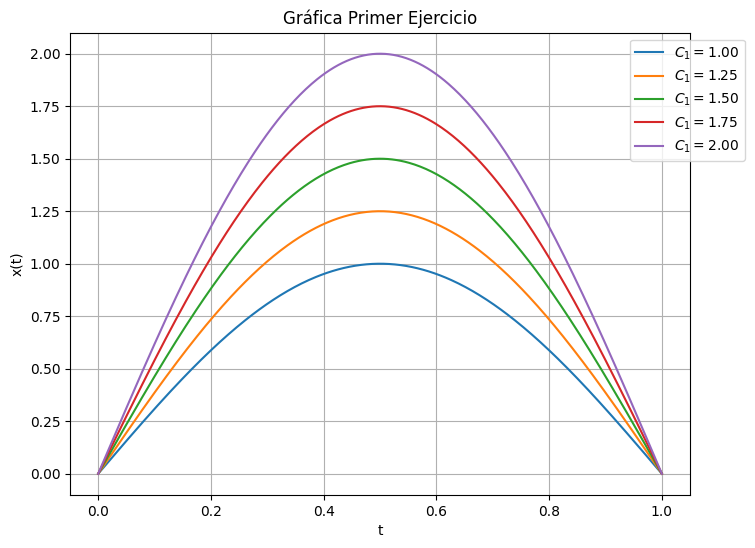

In [6]:
# Convertir la expresión de SymPy a una función de Numpy para graficar
f_final_sol = lambdify((t, C1), f_final_sol, "numpy")

t_vals = np.linspace(0, 1, 400)

plt.figure(figsize=(8, 6))


for C1_value in np.linspace(1, 2, 5):
    x_vals = f_final_sol(t_vals, C1_value)

    label = r'$C_1 = {:.2f}$'.format(C1_value)

    plt.plot(t_vals, x_vals, label=label)

plt.title('Gráfica Primer Ejercicio')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()

#Ejercicio 2
$x'' + kx = 0$

con   $x'(0)=x'(1)=0$

Mandamos a llamar a Sympy y Numpy para la resolución de la EDO y definimos las variables y funciones que serán utilizadas

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, pi, sin, dsolve, Eq, Function, solve, lambdify

t = symbols('t')
k = symbols('k', positive=True)
C1, C2 = symbols('C1 C2')
x = Function('x')

Derivada de la solución general para evaluar las condiciones iniciales

In [8]:
gen_sol = dsolve(Eq(x(t).diff(t, 2) + k * x(t), 0), x(t))

deriv_gen_sol = gen_sol.rhs.diff(t)
print("\nDerivada de la solución general (x'(t)):")
print(deriv_gen_sol)


Derivada de la solución general (x'(t)):
C1*sqrt(k)*cos(sqrt(k)*t) - C2*sqrt(k)*sin(sqrt(k)*t)


Evaluación de las condiciones iniciales en la solución

In [9]:
bc_1 = deriv_gen_sol.subs(t, 0)

C1_value = solve(bc_1, C1)[0]
print(f"De la condición en t = 0, obtenemos: C1 = {C1_value}")

bc_2 = deriv_gen_sol.subs(t, 1)
bc_2_substituted = bc_2.subs(C1, C1_value)

De la condición en t = 0, obtenemos: C1 = 0


In [10]:
k_values = solve(bc_2_substituted, k)
print(f"Los valores posibles de k son: {k_values}")

Los valores posibles de k son: [pi**2]


Se calculan los valores para  $k$  resultantes de la evaluación de las condiciones iniciales

In [11]:
final_sol = gen_sol.rhs.subs({C1: C1_value, k: k_values[0]})

print("Solución general con las condiciones x'(0) = 0 y x'(1) = 0:")
print(f"x(t) = {final_sol}")

Solución general con las condiciones x'(0) = 0 y x'(1) = 0:
x(t) = C2*cos(pi*t)


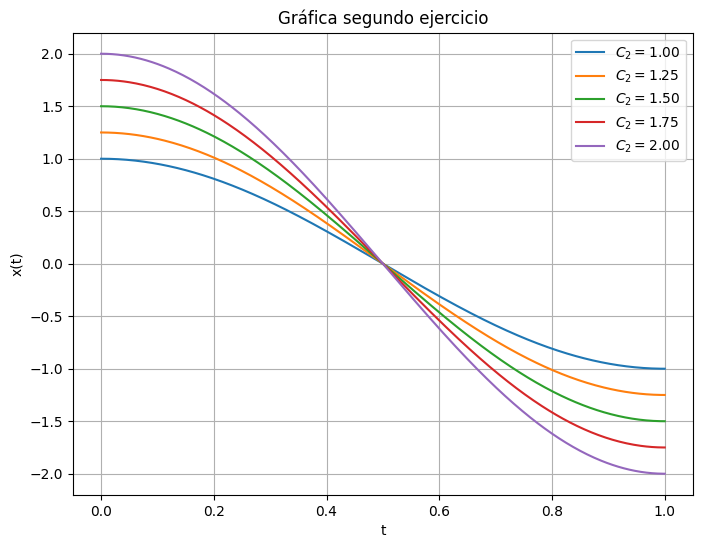

In [12]:
final_sol_with_C2 = gen_sol.rhs.subs({C1: C1_value, k: k_values[0]})

# Convertir la expresión de SymPy a una función de Numpy para graficar
f_final_sol_C2 = lambdify((t, C2), final_sol_with_C2, "numpy")

t_vals = np.linspace(0, 1, 400)

plt.figure(figsize=(8, 6))

labels = []

# Graficar para varios valores de C2
for C2_value in np.linspace(1, 2, 5):
    x_vals = f_final_sol_C2(t_vals, C2_value)

    label = r'$C_2 = {:.2f}$'.format(C2_value)
    labels.append(label)

    plt.plot(t_vals, x_vals, label=label)

plt.title('Gráfica segundo ejercicio')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend(labels)

plt.show()